In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 64.0MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.7MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.7MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 32.0MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df.drop(['Id'], axis = 1, inplace = True)
agg_data = pd.concat([df.iloc[:,:df.shape[1]-1], test_data], axis = 0, ignore_index=True)
agg_data.drop(['Id'],axis=1,inplace=True)
train_end = df.shape[0]-1
test_start = train_end + 1
test_end = agg_data.shape[0]-1
df.columns.values
X = df.loc[:,'MSSubClass':'SaleCondition']
y = df['SalePrice']
print(agg_data.shape, df.shape)
print(agg_data.head(2))

(2919, 79) (1460, 80)
   1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
0           No       706.0         0.0          GLQ          Unf   
1           Gd       978.0         0.0          ALQ          Unf   

   BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir Condition1  \
0           1.0           0.0       Gd      150.0          Y       Norm   
1           0.0           1.0       Gd      284.0          Y      Feedr   

  Condition2 Electrical  EnclosedPorch ExterCond ExterQual Exterior1st  \
0       Norm      SBrkr              0        TA        Gd     VinylSd   
1       Norm      SBrkr              0        TA        TA     MetalSd   

  Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath Functional  \
0     VinylSd   NaN   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [0]:
class Utility:
  def __init__(self):
    pass
  def set_data(self, dataframe):
    self.df = dataframe
  def aggregate(self, column_names):
    pass

In [5]:
import seaborn as sns
from sklearn.impute import SimpleImputer
X.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

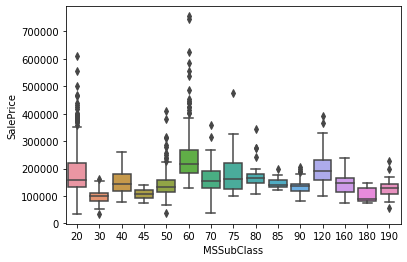

In [6]:
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)


In [7]:
agg_data.loc[agg_data['BsmtCond'].isnull(),'BsmtCond']

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
1585    NaN
1593    NaN
1729    NaN
1778    NaN
1814    NaN
1847    NaN
1848    NaN
1856    NaN
1857    NaN
1858    NaN
1860    NaN
1915    NaN
2040    NaN
2050    NaN
2066    NaN
2068    NaN
2120    NaN
2122    NaN
2185    NaN
2188    NaN
2189    NaN
2190    NaN
2193    NaN
2216    NaN
2224    NaN
2387    NaN
2435    NaN
2452    NaN
2453    NaN
2490    NaN
2498    NaN
2524    NaN
2547    NaN
2552    NaN
2564    NaN
2578    NaN
2599    NaN
2702    NaN
2763    NaN
2766    NaN
2803    NaN
2804    NaN
2824    NaN
2891    NaN
2904    NaN
Name: BsmtCond, 

In [8]:
print(agg_data.isnull().any().value_counts())
agg_data.shape

False    45
True     34
dtype: int64


(2919, 79)

In [9]:
strategies = {'Alley':'NA','LotFrontage':'median','MasVnrType':'None','MasVnrArea':0.0,'BsmtQual':'NA','BsmtCond':'NA','BsmtExposure':'NA','BsmtFinType1':'NA','BsmtFinType2':'NA','BsmtFullBath':0,'BsmtHalfBath':0,'BsmtQual':'NA','BsmtUnfSF':0.0,'BsmtFinSF1':0.0,'BsmtFinSF2':0.0,'Electrical':'SBrkr','Exterior1st':'Other','Exterior2nd':'Other','Fence':'NA','FireplaceQu':'NF','Functional':'Typical','GarageArea':0.0,'GarageCars':0,'GarageQual':'NA','GarageYrBlt':0,'GarageType':'NA','GarageYrBlt':0,'GarageFinish':'NA','GarageQual':'NA','GarageCond':'NA','KitchenQual':'TA','LotFrontage':'median','MSZoning':'mode','MiscFeature':'NA','PoolQC':'NA','SaleType':'Other','TotalBsmtSF':0.0,'Utilities':'mode'}
print(len(strategies.keys()))

34


In [10]:
######CHECK FOR MISSING VALUES
# agg_data.drop(['Id'], axis = 1, inplace = True)
null_cols = agg_data.columns[agg_data.isnull().any()].tolist()
print(len(null_cols))
# from sklearn.impute import SimpleImputer
# imp_median = SimpleImputer(strategy = 'median')
# X = imp_median.fit_transform(X)

34


In [11]:
x1 = list(strategies.keys())
print(x1)
res = np.setdiff1d(np.array(x1), np.array(null_cols))
print(res)
print(agg_data['2ndFlrSF'].isnull().any())

['Alley', 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars', 'GarageQual', 'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCond', 'KitchenQual', 'MSZoning', 'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities']
[]
False


In [12]:
for col in null_cols:
  if strategies[col] == 'median':
    si = SimpleImputer(strategy = 'median')
    agg_data[col] = si.fit_transform(np.array(agg_data[col]).reshape(-1,1))
  elif strategies[col] == 'mode':
    si = SimpleImputer(strategy = 'most_frequent')
    agg_data[col] = si.fit_transform(np.array(agg_data[col]).reshape(-1,1))
  else:
    si = SimpleImputer(strategy = 'constant', fill_value = strategies[col])
    print(col,end="")
    agg_data[col] = si.fit_transform(np.array(agg_data[col]).reshape(-1,1))

AlleyBsmtCondBsmtExposureBsmtFinSF1BsmtFinSF2BsmtFinType1BsmtFinType2BsmtFullBathBsmtHalfBathBsmtQualBsmtUnfSFElectricalExterior1stExterior2ndFenceFireplaceQuFunctionalGarageAreaGarageCarsGarageCondGarageFinishGarageQualGarageTypeGarageYrBltKitchenQualMasVnrAreaMasVnrTypeMiscFeaturePoolQCSaleTypeTotalBsmtSF

In [13]:
agg_data.isnull().any()

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
Alley            False
BedroomAbvGr     False
BldgType         False
BsmtCond         False
BsmtExposure     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtFinType1     False
BsmtFinType2     False
BsmtFullBath     False
BsmtHalfBath     False
BsmtQual         False
BsmtUnfSF        False
CentralAir       False
Condition1       False
Condition2       False
Electrical       False
EnclosedPorch    False
ExterCond        False
ExterQual        False
Exterior1st      False
Exterior2nd      False
Fence            False
FireplaceQu      False
Fireplaces       False
Foundation       False
FullBath         False
Functional       False
GarageArea       False
GarageCars       False
GarageCond       False
GarageFinish     False
GarageQual       False
GarageType       False
GarageYrBlt      False
GrLivArea        False
HalfBath         False
Heating          False
HeatingQC        False
HouseStyle       False
KitchenAbvG

In [14]:
print(agg_data.isnull().any().value_counts(), agg_data.shape)
df_t = pd.read_csv('train.csv')
print(df_t.shape)
y_t = df_t['SalePrice']
df = pd.concat([agg_data.iloc[:df_t.shape[0],:], y_t], axis = 1)
print(df.isnull().any().value_counts())
# df.columns[agg_data.isnull().any()]

False    79
dtype: int64 (2919, 79)
(1460, 81)
False    80
dtype: int64


In [15]:
np.array(df.loc[df['GarageType']=='NA','GarageType']).shape, np.array(df.loc[df['GarageQual'] == 'NA',:]).shape

((81,), (81, 80))

In [16]:
df['LotFrontage'].isnull().sum()

0

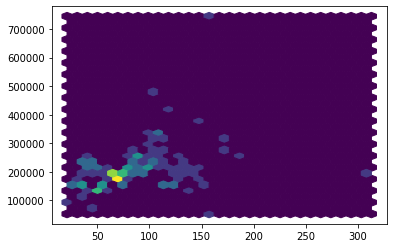

In [17]:
feature = 'LotFrontage'

chop_data = df.loc[:,[feature, 'SalePrice']]
agg_data = chop_data.groupby([feature]).aggregate({feature:'max', 'SalePrice':np.mean})
plt.hexbin(agg_data[feature], agg_data['SalePrice'], gridsize=30)

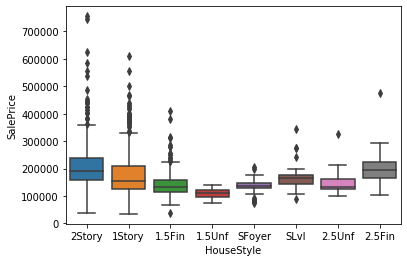

In [18]:
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df)

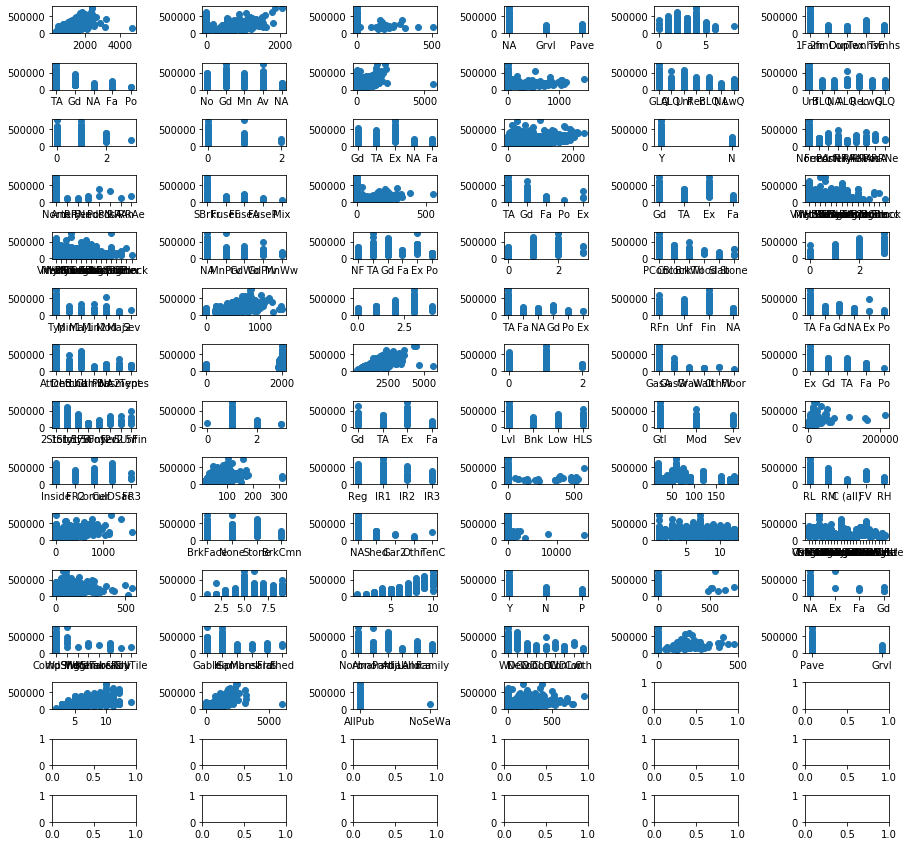

In [19]:
fig, ax = plt.subplots(15, 6,figsize=(15,15))
fig.subplots_adjust(hspace=1.1, wspace=0.8)
k = 0
for i in range(15):
  for j in range(6):
    if k<76:
      ax[i,j].scatter(df.iloc[:,k],df['SalePrice'])
      k+=1

In [0]:
numeric_cols = np.array(df._get_numeric_data().columns)
categorical_cols = np.setdiff1d(df.columns.values, numeric_cols)
# print(df[categorical_feat])

In [0]:
### LOOK FOR OUTLIERS ###

In [22]:
print("{}".format(2))

2


In [30]:
x = 2
y = np.log(x)
print(y, np.exp(y))

0.6931471805599453 2.0


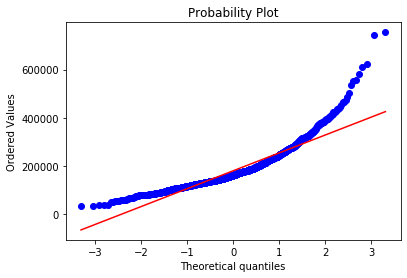

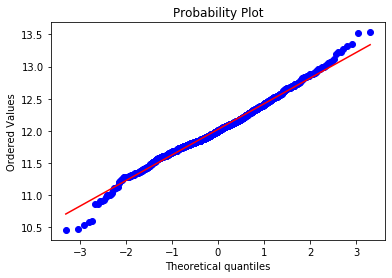

In [24]:
import scipy.stats as stats
measurements = y
stats.probplot(measurements, dist="norm", plot=plt)
plt.figure()
measurements = [np.log(i) for i in y]
stats.probplot(measurements, dist="norm", plot=plt)
df['SalePrice'] = [np.log(i) for i in df['SalePrice']]

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
i = 0
d = {}
for col in categorical_cols:
  d["le_{}".format(i)] = LabelEncoder()
  df[col] = (d["le_{}".format(i)]).fit_transform(df[col])
  i+=1
print(d)
# df = sc.fit_transform(df)

{'le_0': LabelEncoder(), 'le_1': LabelEncoder(), 'le_2': LabelEncoder(), 'le_3': LabelEncoder(), 'le_4': LabelEncoder(), 'le_5': LabelEncoder(), 'le_6': LabelEncoder(), 'le_7': LabelEncoder(), 'le_8': LabelEncoder(), 'le_9': LabelEncoder(), 'le_10': LabelEncoder(), 'le_11': LabelEncoder(), 'le_12': LabelEncoder(), 'le_13': LabelEncoder(), 'le_14': LabelEncoder(), 'le_15': LabelEncoder(), 'le_16': LabelEncoder(), 'le_17': LabelEncoder(), 'le_18': LabelEncoder(), 'le_19': LabelEncoder(), 'le_20': LabelEncoder(), 'le_21': LabelEncoder(), 'le_22': LabelEncoder(), 'le_23': LabelEncoder(), 'le_24': LabelEncoder(), 'le_25': LabelEncoder(), 'le_26': LabelEncoder(), 'le_27': LabelEncoder(), 'le_28': LabelEncoder(), 'le_29': LabelEncoder(), 'le_30': LabelEncoder(), 'le_31': LabelEncoder(), 'le_32': LabelEncoder(), 'le_33': LabelEncoder(), 'le_34': LabelEncoder(), 'le_35': LabelEncoder(), 'le_36': LabelEncoder(), 'le_37': LabelEncoder(), 'le_38': LabelEncoder(), 'le_39': LabelEncoder(), 'le_40': 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import norm, skew, probplot
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
# req_cols = df.columns.values
X = df.iloc[:,:df.shape[1]-1]

skewness = X.apply(lambda x: skew(x)).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
print(skewness_df.head(10))
from scipy.special import boxcox1p
boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
print(boxcox_features)
lam = 0.15
for col in boxcox_features:
    X.loc[:, col] = boxcox1p(X[col], lam)
skewness2 = X.apply(lambda x: skew(x)).sort_values(ascending=False)

skewness_df2 = pd.DataFrame({'Skewness': skewness2})
skewness_df2.head(10)

               Skewness
Utilities     38.170678
MiscVal       24.451640
PoolArea      14.813135
Condition2    13.158307
LotArea       12.195142
3SsnPorch     10.293752
Heating        9.844972
LowQualFinSF   9.002080
RoofMatl       8.101068
MiscFeature    5.011625
Index(['Utilities', 'MiscVal', 'PoolArea', 'Condition2', 'LotArea',
       '3SsnPorch', 'Heating', 'LowQualFinSF', 'RoofMatl', 'MiscFeature',
       'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch',
       'BsmtHalfBath', 'EnclosedPorch', 'Condition1', 'MasVnrArea',
       'LotFrontage', 'OpenPorchSF', 'BldgType', 'BsmtFinSF1', 'WoodDeckSF',
       'TotalBsmtSF', 'RoofStyle', 'MSSubClass', '1stFlrSF', 'GrLivArea',
       'BsmtUnfSF', '2ndFlrSF', 'BsmtExposure', 'LotConfig', 'KitchenQual',
       'MSZoning', 'ExterQual', 'Fence', 'ExterCond', 'SaleCondition',
       'BsmtCond', 'Electrical', 'LandContour', 'BsmtFinType2', 'GarageQual',
       'PavedDrive', 'CentralAir', 'GarageCond', 'SaleType', 'GarageYrBlt',
       'F

,Skewness
Utilities,38.170678
PoolArea,14.363418
Heating,8.059149
3SsnPorch,7.827826
RoofMatl,7.643284
LowQualFinSF,7.593301
MiscVal,5.505530
MiscFeature,4.670296
LandSlope,4.345857
KitchenAbvGr,3.995746


In [105]:
from xgboost.sklearn import XGBRegressor

y = df.iloc[:,df.shape[1]-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
x_train_fit, x_val, y_train_fit, y_val = train_test_split(x_train, y_train, test_size = 0.2)
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train_fit, y_train_fit)
gbrt = GradientBoostingRegressor(n_estimators = 5000, loss = 'huber')
gbrt.fit(x_train_fit, y_train_fit)
xgrb = XGBRegressor(obj = 'reg:squarederror', n_estimators = 10)
xgrb.fit(x_train_fit, y_train_fit)

[18:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, obj='reg:squarederror',
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [0]:
members = [rf, gbrt, xgrb]

In [0]:
def stacked_preds(members, inputX):
  print(inputX.shape)
  n_models = len(members)
  stackX = None
  for member in members:
    yhat = member.predict(inputX)
    if stackX is None:
      stackX = yhat
    else:
      stackX = np.dstack((stackX, yhat))
  return stackX.reshape(-1,n_models)


In [0]:
def make_predictions(test_data, members, upper_model):
  print(test_data.shape)
  stack = None
  n_models = len(members)
  for member in members:
    ypred = member.predict(test_data)
    if stack is None:
      stack = ypred
    else:
      stack = np.dstack((stack, ypred))
  print("stack shape", stack.shape)
  preds = upper_model.predict(stack.reshape(-1,n_models))
  return preds

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
xgb_reg = RandomForestRegressor(n_estimators = 100)
stack_p = stacked_preds(members, x_val)
print(stack_p.shape)
# plt.scatter(stack_p.T[0], stack_p.T[1])
xgb_reg.fit(stack_p, y_val)
test_preds = make_predictions(x_test, members, xgb_reg)
# plt.scatter(y_test, test_preds)

(196, 79)
(196, 3)
(482, 79)
stack shape (1, 482, 3)


In [0]:
importances = gbrt.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]
req_cols = df.columns.values[indices[:9]]
print(req_cols)

['OverallQual' 'GrLivArea' 'TotalBsmtSF' 'GarageCars' 'GarageArea'
 'BsmtFinSF1' '1stFlrSF' 'OverallCond' 'GarageType']


In [0]:
sc = StandardScaler()
importances = sc.fit_transform(importances.reshape(-1,1))
importances = importances.ravel()
%matplotlib inline
plt.figure(figsize=(15,15))
plt.bar(range(x_train.shape[1]),importances[indices], align='center', width = 0.8)

plt.xticks(range(x_train.shape[1] + 1), req_cols, rotation=90)

In [0]:
print(importances[indices][:10])

[ 7.93345604  2.8280917   0.86408349  0.45833136  0.08272106  0.31905513
  0.0522832  -0.09929845  0.10090924  0.20316962]


In [0]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [0]:
rfecv = RFECV(estimator=gbrt, step=1, scoring="neg_mean_squared_error")
rfecv.fit(X, y)

In [0]:
rfecv.n_features_

In [0]:
l = (rfecv.support_).tolist()
col_names = df.columns.values.tolist()
req_cols = []
for k in range(len(l)):
  if l[k] == True:
      req_cols.append(col_names[k])
print(len(req_cols), req_cols)

(482, 79)
stack shape (1, 482, 3)
(482,) (482,)
0.15271443348617683


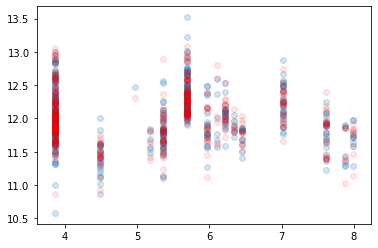

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
y_preds = make_predictions(x_test,members, xgb_reg)
print(y_preds.shape, y_test.shape)
mse = np.sqrt(mean_squared_error(y_test, y_preds))
plt.scatter(x_test['MSSubClass'], y_test, alpha = 0.2)
plt.scatter(x_test['MSSubClass'], y_preds, color = 'red', alpha = 0.1)
print(mse)

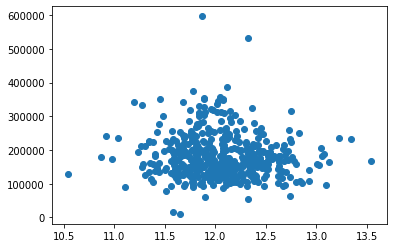

In [0]:
plt.scatter(y_test, y_preds)


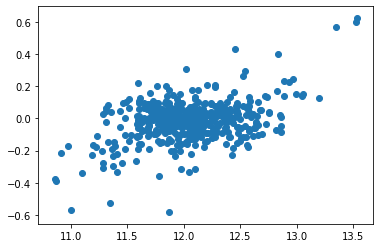

In [0]:
############### RESIDUAL PLOT ###############
plt.scatter(y_test, y_test - y_preds)

In [0]:
test_data = pd.read_csv('test.csv')
test_data.drop(columns=cols, axis = 1, inplace=True)
test_null = (test_data.columns[test_data.isnull().any()]).tolist()
print(np.setdiff1d(np.array(test_null), null_cols))


['BsmtFinSF1' 'BsmtFinSF2' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtUnfSF'
 'Exterior1st' 'Exterior2nd' 'Functional' 'GarageArea' 'GarageCars'
 'KitchenQual' 'MSZoning' 'SaleType' 'TotalBsmtSF' 'Utilities']


In [0]:
test_data = pd.read_csv('test.csv')

test_data.drop(columns=cols, axis = 1, inplace=True)
for col in null_cols:
  if strategies[col] == 'median':
    si = SimpleImputer(strategy = 'median')
    test_data[col] = si.fit_transform(np.array(test_data[col]).reshape(-1,1))
  else:
    si = SimpleImputer(strategy = 'constant', fill_value = strategies[col])
    test_data[col] = si.fit_transform(np.array(test_data[col]).reshape(-1,1))
i=0
for col in categorical_cols:
  le = LabelEncoder()
  test_data[col] = le.fit_transform(test_data[col])
  i+=1
test_data = test_data[req_cols]
y_test_preds = gbrt.predict(test_data)